In [5]:
from PIL import Image
from IPython.display import display

Single imputer report:

completed several operations working on single daphnia tracking:

created a class `NPZer` which will unzip and unpack .npz files output from TRex. for imputation and transformation

created a class `TRexDataCleaner` which removes disjoint data points 

created a class `TRexImputer` which creates a framework for employing different imputation strategies on missing daphina tracking

created easy plotting functions for daphnia tracking

created framework for estimating maxiumum daphnia velocity used in data cleaning and imputation




In [ ]:
#main example of the whole process

#  NPZer.py

## `NPZer.py` holds the class `NPZer` which is used to unzip a .npz file (output of TRex tracking). This data can be directly converted to a pandas table and subsequently to a .csv file or plotted 

## Example Usage:

In [4]:
# Import necessary tools
import pandas as pd
import numpy as np
from src.data_manipulation.NPZer import NPZer

NPZer = NPZer()

# Set desired parameters
SOURCE_DIR = 'data/clean_fish_data/fish_data_clean.csv'
INVERT_Y = True
PARAMS = ['time', 'X', 'Y']

In [ ]:
# Unzip and turn data into a pandas table
unzippedData = NPZer.pandafy(source_dir=SOURCE_DIR,
                              invertY=INVERT_Y,
                              params=PARAMS)

In [ ]:
# Print data in form of pandas table
print('TRex Data:\n', unzippedData)

### Output

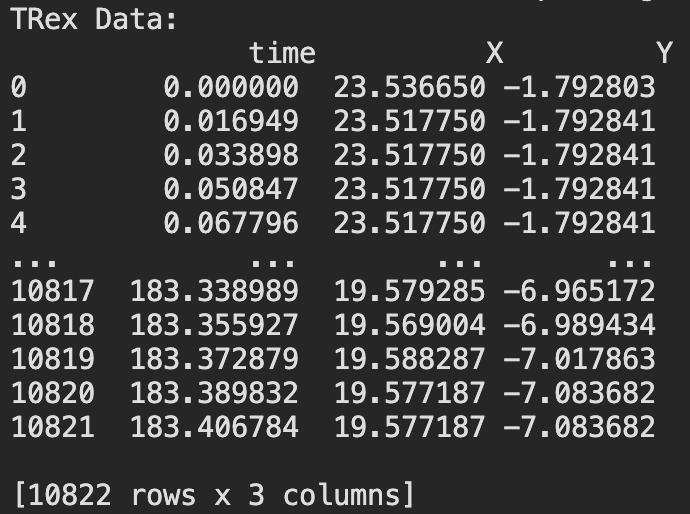

In [8]:
display(Image.open('output_images/NPZer_output.png'))

#  TRexDataCleaner.py

## `TRexDataCleaner.py` holds the class `TRexDataCleaner` which is used to clean disjoint data in TRex tracking data for later imputation, i.e., disjoint data points are rendered as `np.inf`

## Example Usage

In [ ]:
# Import necessary tools
from src.data_manipulation.TRexDataCleaner import TRexDataCleaner

dataCleaner = TRexDataCleaner()

# Set desired parameters
VMAX = 25

In [ ]:
# Set sample of original data
originalData = unzippedData[:25]

# Print sample of original data
print('Original Data:\n', originalData)

In [ ]:
# Clean data
cleanedData, removedData = dataCleaner.renderDiscontinuities(data=originalData, vmax=25)

# Print cleaned data
print('Cleaned Data:\n', cleanedData)

### Output

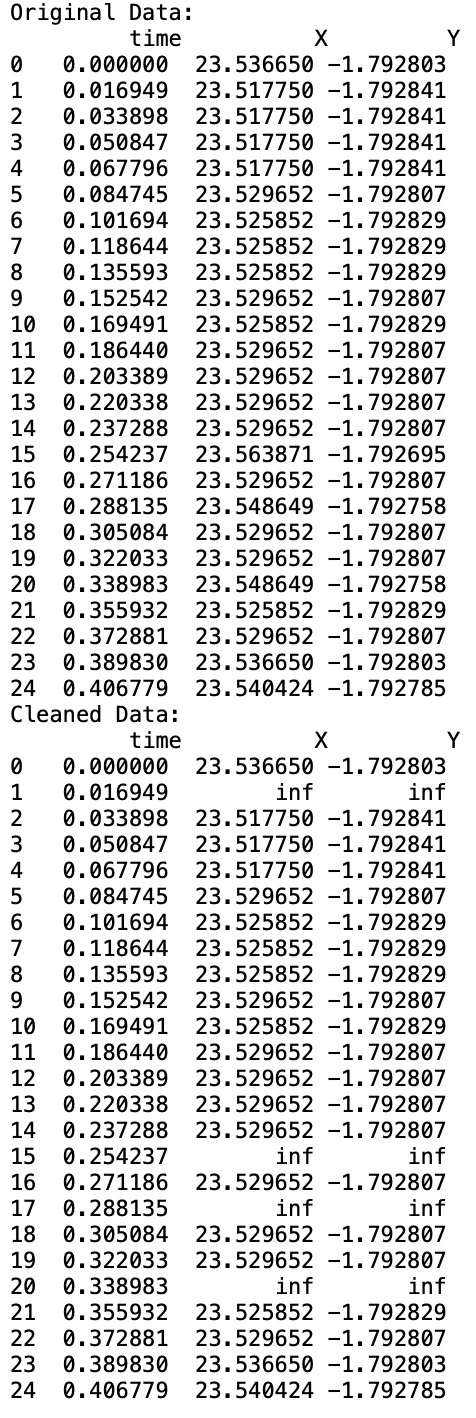

In [9]:
display(Image.open('output_images/TRexDataCleaner_output.png'))

#  TRexImputer.py

# `TRexImputer.py` holds the class `TRexImputer` which is used to impute/fill in discontinuous TRex data with a desired `impute` function. This should be used with data already cleaned with `TRexDataCleaner`

## Example Usage

In [ ]:
# Import necessary tools
from src.data_manipulation.TRexImputer import TRexImputer

imputer = TRexImputer()

# Set desired parameters
DATA = cleanedData
FUNCTION = 'avgValue'

In [ ]:
# Print original data
print('Original Data:\n', cleanedData)

In [ ]:
# Impute data
imputedData = imputer.impute(data=DATA, function=FUNCTION)

# Print imputed data
print('Imputed Data:\n', imputedData)

### Output

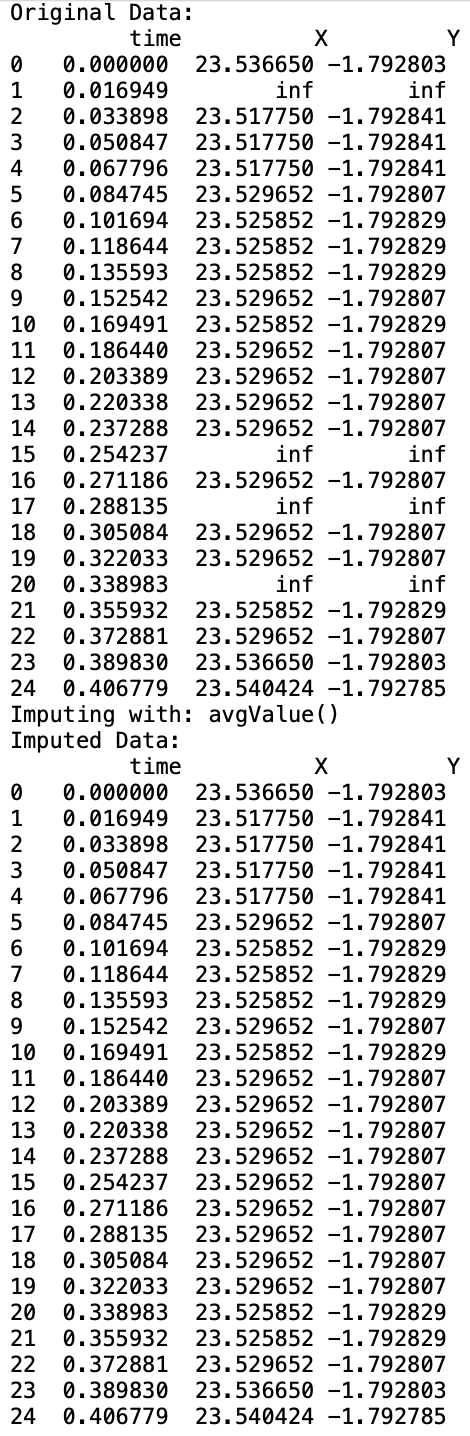

In [12]:
display(Image.open('output_images/TRexImputer_output.png'))

# avgValue.py

## `avgValue.py` holds the `impute` function which imputes data in between gaps of discontinuous points. The function calculates the velocity between each gap of data, and imputes the respective points according it.

## Example usage
### Usage is shown in above example as `FUNCTION = 'avgValue'`

# plotting explanation
